# Hierarchical Clustering 

Unlike most of the clustering algorithms we have seen before, hierarchical clustering key interest lies in the fact that you don't need to know the number of clusters that "exist" before you actually get started. 

My motivation for this specific aspect of the **clustering** comes from the fact that even though clustering is one of the most important parts of Exploratory Data Analysis it is also one the least documented apart form the maain techniques like **PCA** or **TSNE** of master Bengio. 

As usual, a bit of notations: 

$ X^{n,m} $ : our data points (here artificially generated). <br>
$ n $: the number of samples<br>
$ m $ the number of features<br>
$ Z $ our clustering path dependancy <br>
$ k $ the number of clusters that we set (hyper parameter essentially) <br>

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#### Generate Artificial - Fake Data 

(150, 2)


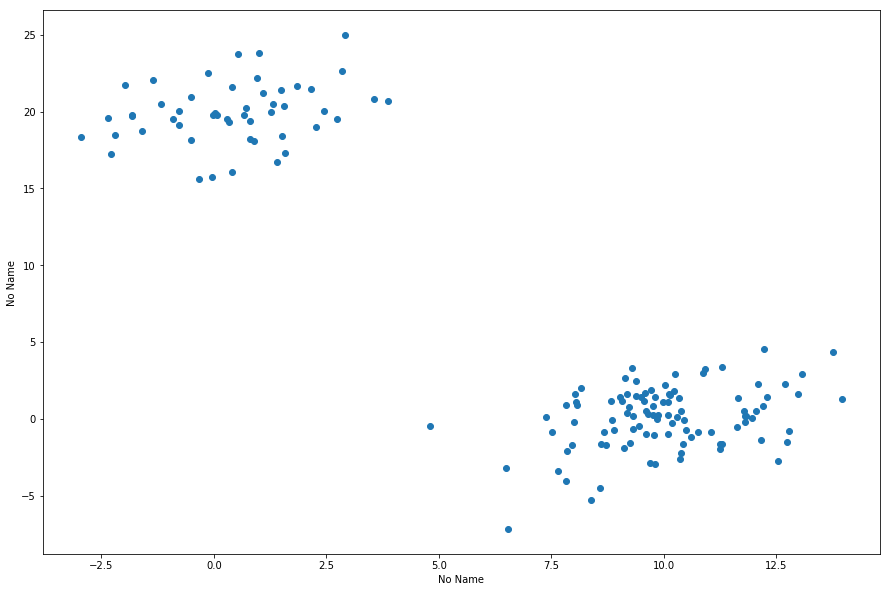

In [47]:
np.random.seed(6)  # Set yours seeds to reproduce my results 
cluster1 = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
cluster2 = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
clusters = np.concatenate((cluster1, cluster2))
print (X.shape)  # 150 samples with 2 dimensions
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("No Name")
ax.set_ylabel("No Name")
ax.scatter(X[:,0], X[:,1])
plt.show()

#### Perform Clustering: 

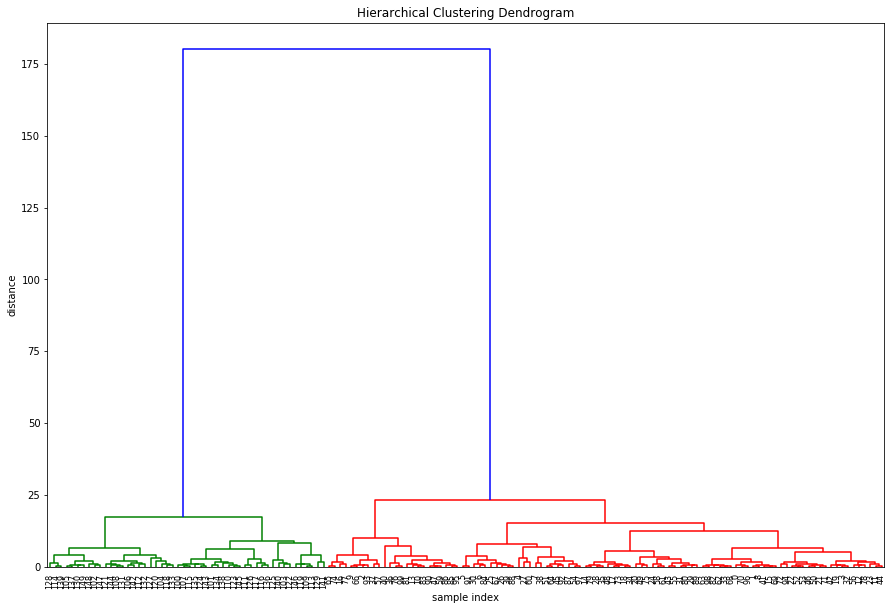

In [44]:
Z = linkage(X, 'ward')
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
dendrogram(Z, ax = ax, leaf_rotation=90, leaf_font_size=8,)
plt.show()

## Interpretation 

Python makes it so easy ! 
But what actually happens behind the scene?

Well as I said in the title, think of hierarchical clustering as an unsupervised way of clustering, meaning that whatever algorithm you are going to use, it will have to figure out on its own where clusters to perform. Now you should ask yourself two questions: 
* How to Build those clusters 
* How many of them you would like to build 

Any hierachical clustering has to be recursive meaning you apply the same operation over and over again until... everything is clustered ! Over the years many authors (yes they've done the hardwork not me) have come up with different techniques for determining the similarity between the different clusters. 

To understand the algorithm that we have just applied let's define our similarity criterion: the **Ward minimum variance criterion** focuses on the within-cluster variance. 

We define the intial distances between two points as the squared Euclidian distance between them:

$$ d_{ij} = d({X_{i}}, {X_{j}}) = ||X_{i} - X_{j}|| $$

after our first iteration and for all the foloowing we might want to group clusters together. Here we will use another method defined by Lance Williams. 

Let us define: $C_{i}$, $C{j}$ and   $C_{k} $ three clusters and $d_{(ij)k}$, $d_{(ik)}$ and $d_{(jk)}$ their pairwise ditance. Those pairwise distances can be recursively comuted using: 

$ d_{{(ij)k}}=\alpha _{i}d_{{ik}}+\alpha _{j}d_{{jk}}+\beta d_{{ij}}+\gamma |d_{{ik}}-d_{{jk}}|$ 

Now these Lance William framework allows stability when applying the algorithm recursively. From one method to another the key changes are going to set up of those coefficients. In the method that we applied above, we went for a **cluster size dependancy** and this is generally a good starting point (I would recommend it strongly before jumping to more fancy stuff should you want to penalyse certain dimensions of the clustering:

$$  d(C_{i}\cup C_{j},C_{k})={\frac  {n_{i}+n_{k}}{n_{i}+n_{j}+n_{k}}}\;d(C_{i},C_{k})+{\frac  {n_{j}+n_{k}}{n_{i}+n_{j}+n_{k}}}\;d(C_{j},C_{k})-{\frac  {n_{k}}{n_{i}+n_{j}+n_{k}}}\;d(C_{i},C_{j})     $$ 

and you can see the application of the Lance Williams framework with coefficients: 

$$  \alpha _{l}={\frac  {n_{l}+n_{k}}{n_{i}+n_{j}+n_{k}}},\qquad \beta ={\frac  {-n_{k}}{n_{i}+n_{j}+n_{k}}},\qquad \gamma =0         $$ 

And we can see that we actually find our two clusters back!! <br>

Having a look at our $Z$ provides a bit more explanation: 

In [48]:
Z.shape

(149, 4)

Why 149 ? Because we can only form $n-1$ clusters (we can also form less of course. <br>
Why 4 ? 
* First element is the index of the first cluster
* Second element is the index of the second cluster
* Third element represents the distance between both 
* Fourth element is informative, it tells how many observations live in the new cluster


Other pairwise distance metric would invole: 


* Single : $$ d(u,v) = min(dist(u[i],v[j])) $$
* Complete : $$ d(u,v) = max(dist(u[i],v[j])) $$
* Average : $$ d(u,v) = \sum_{ij} \frac{(dist(u[i],v[j]))}{|u| * |v|} $$




Sources: 
* https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf